In [1]:
#Importing relevant libraries required for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_rel, chisquare, chi2_contingency, chi2, f_oneway, poisson, expon, pearsonr
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

# ***Loading Data***

In [3]:
# Loading the cdv data and saving it to a DataFrame 'df'
df_OG = pd.read_csv("delhivery.csv")

#Reading the top 5 rows of data in DataFrame df
df_OG.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# ***Feature Exploration / Data Pre-processing***

1. **Define Problem Statement and perform Exploratory Data Analysis (10 points)**
* Definition of problem (as per given problem statement with additional views)
* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.



**Problem Statement :** Clean, sanitize and manipulate data to get useful features out of raw fields, make sense out of the raw data and help the data science team to build forecasting models so that it helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
Delhivery wants the quality, efficiency and profitability of their business to be more than its competitors.

In [5]:
#Creating a deep copy of the original data so original data is not updated
df = df_OG.copy()
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.shape

(144867, 24)

In [7]:
# Number of unique values in each column / feature
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
df['data'].value_counts()

data
training    104858
test         40009
Name: count, dtype: int64

In [10]:
df['route_type'].value_counts()

route_type
FTL        99660
Carting    45207
Name: count, dtype: int64

In [11]:
#Dropping columns that are Unknown Fields as they are not helpful for analysis

df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [13]:
#Filtering with a single trip uuid to understand what does the data structure look like
df[df['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


***Handing Missing values*** - Source and Destination names contain null values

In [15]:
# Sum of null values for Source and Destination Name BEFORE handling
df['source_name'].isnull().sum(), df['destination_name'].isnull().sum()

(293, 261)

In [16]:
df[df['source_name'].isnull()]['source_center'].unique(), df[df['destination_name'].isnull()]['destination_center'].unique()

(array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
        'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
        'IND505326AAB', 'IND852118A1B'], dtype=object),
 array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
        'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
        'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
        'IND122015AAC'], dtype=object))

In [17]:
#Handling missing Source & Destination names by updating them with last 5 digits of respective Center name
df['source_name'].fillna(df['source_center'].str.strip().str[-5:] , inplace = True)
df['destination_name'].fillna(df['destination_center'].str.strip().str[-5:] , inplace = True)

In [18]:
# Sum of null values for Source and Destination Name AFTER handling
df['source_name'].isnull().sum(), df['destination_name'].isnull().sum()

(0, 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [20]:
df.shape

(144867, 19)

***Converting following columns to Data Time***

* trip_creation_time
* od_start_time
* od_end_time

In [22]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [24]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


***Merging rows***

In [26]:
df_grouped = df.groupby(['trip_uuid','source_center','destination_center','trip_creation_time','od_start_time','od_end_time']).sum().reset_index()
df_grouped.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,data,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,trainingtrainingtrainingtrainingtrainingtraini...,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLF...,Kanpur_Central_H_6 (Uttar Pradesh)Kanpur_Centr...,Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_...,22680.0,3778.765471,6484.0,3464.0,4540.1261,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,trainingtrainingtrainingtrainingtrainingtraini...,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLF...,Bhopal_Trnsport_H (Madhya Pradesh)Bhopal_Trnsp...,Kanpur_Central_H_6 (Uttar Pradesh)Kanpur_Centr...,20979.0,5082.046634,9198.0,4323.0,6037.6386,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,trainingtrainingtraining,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,CartingCartingCarting,Doddablpur_ChikaDPP_D (Karnataka)Doddablpur_Ch...,Chikblapur_ShntiSgr_D (Karnataka)Chikblapur_Sh...,174.0,53.310332,96.0,55.0,60.3157,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,trainingtrainingtrainingtrainingtrainingtraining,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,CartingCartingCartingCartingCartingCarting,Tumkur_Veersagr_I (Karnataka)Tumkur_Veersagr_I...,Doddablpur_ChikaDPP_D (Karnataka)Doddablpur_Ch...,732.0,186.897974,303.0,155.0,209.1151,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,trainingtrainingtrainingtrainingtrainingtraini...,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTL,Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_...,Chandigarh_Mehmdpur_H (Punjab)Chandigarh_Mehmd...,10008.0,1725.590250,2601.0,1427.0,1975.7409,608.0,231.0,317.7408


In [27]:
#Aggregating by 1st row of start time, last row of end time and sum of numerical features
df_grouped2 = df_grouped.groupby('trip_uuid').agg({'source_center' : 'first',
                                     'destination_center' : 'last',
                                     'trip_creation_time' : 'first',
                                     'od_start_time' : 'min',
                                     'od_end_time' : 'last',
                                     'start_scan_to_end_scan' : 'sum',
                                     'actual_distance_to_destination' : 'sum',
                                     'actual_time' : 'sum',
                                     'osrm_time' : 'sum',
                                     'osrm_distance' : 'sum'
                                    }).reset_index().sort_values(['trip_uuid','od_end_time'])
df_grouped2.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,10577.7647
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,269.4308
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,89447.2488
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1586.0,239.007304,556.0,207.0,266.2914


In [28]:
#Verifying the start time and end time is showing correctly
df_grouped2[df_grouped2['trip_uuid'] == 'trip-153741093647649320']

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
5919,trip-153741093647649320,IND388121AAA,IND388320AAA,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,975.0,271.559234,510.0,284.0,335.6639


***Feature Engineering***

In [30]:
df_trip = df_grouped2.copy()

In [31]:
#Calculating time taken between od_start_time and od_end_time and keeping it as a feature named od_time_diff_hour

df_trip['od_time_diff_hour'] = df_trip['od_end_time'].sub(df_trip['od_start_time'], axis = 0)

df_trip.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,89447.2488,2 days 03:39:43.415483
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475,0 days 01:40:29.696112
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1586.0,239.007304,556.0,207.0,266.2914,0 days 03:52:33.373696


In [32]:
# Destination Name: Split and extract features out of destination. City-place-code (State)

df_trip['dest_city'] = df_trip['destination_center'].str.strip().str[:3]
df_trip['dest_place'] = df_trip['destination_center'].str.strip().str[3:9]
df_trip['dest_code'] = df_trip['destination_center'].str.strip().str[9:12]

df_trip.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,dest_city,dest_place,dest_code
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728,IND,209304,AAA
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161,IND,561203,AAB
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,89447.2488,2 days 03:39:43.415483,IND,000000,ACB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475,0 days 01:40:29.696112,IND,401104,AAA
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1586.0,239.007304,556.0,207.0,266.2914,0 days 03:52:33.373696,IND,583119,AAA


In [33]:
# Source Name: Split and extract features out of Source. City-place-code (State)

df_trip['source_city'] = df_trip['source_center'].str.strip().str[:3]
df_trip['source_place'] = df_trip['source_center'].str.strip().str[3:9]
df_trip['source_code'] = df_trip['source_center'].str.strip().str[9:12]

df_trip.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,dest_city,dest_place,dest_code,source_city,source_place,source_code
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728,IND,209304,AAA,IND,209304,AAA
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161,IND,561203,AAB,IND,561203,AAB
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,89447.2488,2 days 03:39:43.415483,IND,000000,ACB,IND,000000,ACB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475,0 days 01:40:29.696112,IND,401104,AAA,IND,400072,AAB
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1586.0,239.007304,556.0,207.0,266.2914,0 days 03:52:33.373696,IND,583119,AAA,IND,583101,AAA


In [34]:
# Trip_creation_time: Extract features like month, year, day

df_trip['trip_creation_year'] = df_trip['trip_creation_time'].dt.year
df_trip['trip_creation_month'] = df_trip['trip_creation_time'].dt.month
df_trip['trip_creation_day'] = df_trip['trip_creation_time'].dt.day
df_trip['trip_creation_dayofweek'] = df_trip['trip_creation_time'].dt.dayofweek

df_trip.head()

,trip_uuid,source_center,destination_center,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,dest_city,dest_place,dest_code,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
0,trip-153671041653548748,IND209304AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,43659.0,8860.812105,15682.0,7787.0,...,IND,209304,AAA,IND,209304,AAA,2018,9,12,2
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,906.0,240.208306,399.0,210.0,...,IND,561203,AAB,IND,561203,AAB,2018,9,12,2
2,trip-153671043369099517,IND000000ACB,IND000000ACB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,248631.0,68163.502238,112225.0,65768.0,...,IND,000000,ACB,IND,000000,ACB,2018,9,12,2
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,...,IND,401104,AAA,IND,400072,AAB,2018,9,12,2
4,trip-153671052974046625,IND583101AAA,IND583119AAA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1586.0,239.007304,556.0,207.0,...,IND,583119,AAA,IND,583101,AAA,2018,9,12,2


In [35]:
#Dropping raw data from which features have been engineered

df_trip.drop(['od_start_time','od_end_time','source_center','destination_center','trip_creation_time'], axis = 1, inplace = True)

df_trip.head()

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,dest_city,dest_place,dest_code,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
0,trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728,IND,209304,AAA,IND,209304,AAA,2018,9,12,2
1,trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161,IND,561203,AAB,IND,561203,AAB,2018,9,12,2
2,trip-153671043369099517,248631.0,68163.502238,112225.0,65768.0,89447.2488,2 days 03:39:43.415483,IND,000000,ACB,IND,000000,ACB,2018,9,12,2
3,trip-153671046011330457,200.0,28.529648,82.0,24.0,31.6475,0 days 01:40:29.696112,IND,401104,AAA,IND,400072,AAB,2018,9,12,2
4,trip-153671052974046625,1586.0,239.007304,556.0,207.0,266.2914,0 days 03:52:33.373696,IND,583119,AAA,IND,583101,AAA,2018,9,12,2


***In-depth analysis : Outlier Detection***

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

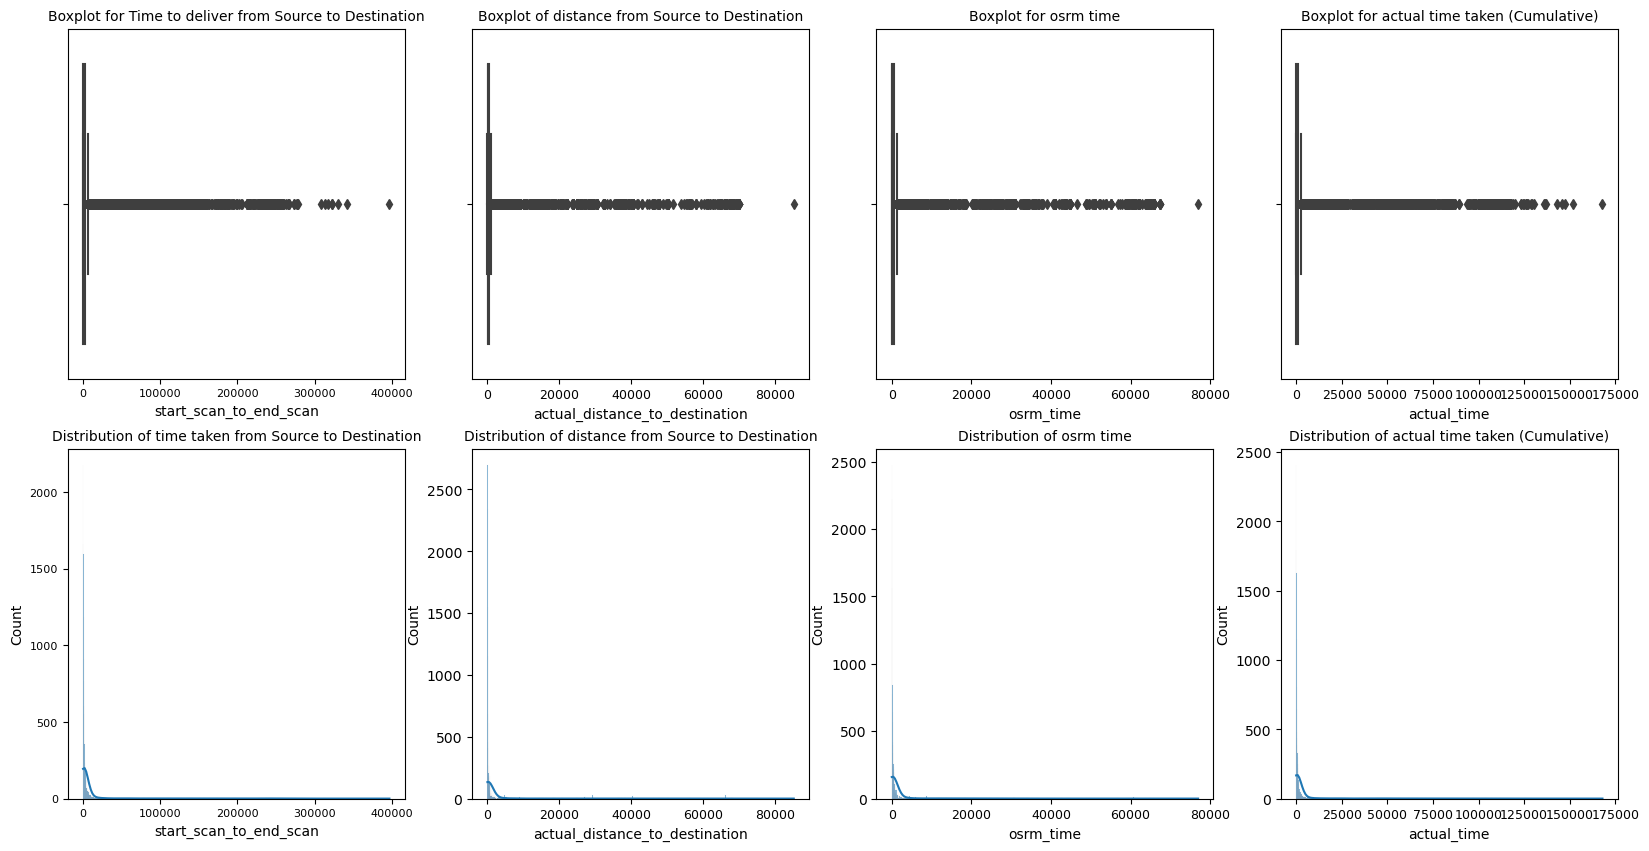

In [37]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Time to deliver from Source to Destination",fontsize = 10)
ax = sns.boxplot(data = df_trip, x = 'start_scan_to_end_scan')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot of distance from Source to Destination",fontsize = 10)
ax = sns.boxplot(data = df_trip, x = 'actual_distance_to_destination', )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot for osrm time",fontsize = 10)
ax = sns.boxplot(data = df_trip, x = 'osrm_time')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot for actual time taken (Cumulative)",fontsize = 10)
ax = sns.boxplot(data = df_trip, x = 'actual_time')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of time taken from Source to Destination",fontsize = 10)
sns.histplot(data = df_trip, x = 'start_scan_to_end_scan', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Distribution of distance from Source to Destination",fontsize = 10)
sns.histplot(data = df_trip, x = 'actual_distance_to_destination', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Distribution of osrm time",fontsize = 10)
sns.histplot(data = df_trip, x = 'osrm_time', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Distribution of actual time taken (Cumulative)",fontsize = 10)
sns.histplot(data = df_trip, x = 'actual_time', kde = True)

plt.show()

***In-depth analysis : Outlier Handling - IQR Method***

In [39]:
df_ot = df_trip.copy()

In [40]:
df_ot.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817,14817.0,14817.000000,14817.000000,14817.000000
mean,9398.345482,2288.554169,4076.333941,2091.007289,2784.231856,0 days 07:24:51.792466861,2018.0,9.120672,18.370790,2.919349
std,33701.706672,8798.110164,15216.870041,7956.882351,10759.101819,0 days 09:38:44.964775826,0.0,0.325757,7.893275,1.927769
min,26.000000,9.002461,9.000000,6.000000,9.072900,0 days 00:23:27.688109,2018.0,9.000000,1.000000,0.000000
25%,408.000000,49.597866,142.000000,62.000000,65.738600,0 days 02:15:29.193653,2018.0,9.000000,14.000000,1.000000
50%,985.000000,134.059655,348.000000,167.000000,173.593600,0 days 03:57:59.224912,2018.0,9.000000,19.000000,3.000000
75%,2826.000000,463.956888,1063.000000,516.000000,607.677400,0 days 07:59:41.491461,2018.0,9.000000,25.000000,5.000000
max,396800.000000,85110.885093,167920.000000,76953.000000,102415.868000,5 days 11:38:33.117274,2018.0,10.000000,30.000000,6.000000


In [41]:
# IQR values for osrm_time
print(f" Min, Max : {df_ot['osrm_time'].min(), df_ot['osrm_time'].max()}")

x =  62 # 25th percentile
y = 516 # 75th percentile
IQR = y - x
IQR_25 = x - 1.5*IQR
IQR_75 = y + 1.5*IQR

print(f" IQR_25, IQR_75 : {IQR_25, IQR_75}")

 Min, Max : (6.0, 76953.0)
 IQR_25, IQR_75 : (-619.0, 1197.0)


In [42]:
#Outlier treatment for osrm_time
df_ot['osrm_time'] = df_ot['osrm_time'].apply(lambda x : IQR_75 if x > y else x )
print(f" Min, Max : {df_ot['osrm_time'].min(), df_ot['osrm_time'].max()}")

 Min, Max : (6.0, 1197.0)


In [43]:
# IQR values for actual_distance_to_destination
print(f" Min, Max : {df_ot['actual_distance_to_destination'].min(), df_ot['actual_distance_to_destination'].max()}")

x =  49.597866 # 25th percentile
y = 463.956888 # 75th percentile
IQR = y - x
IQR_25 = x - 1.5*IQR
IQR_75 = y + 1.5*IQR

print(f" IQR_25, IQR_75 : {IQR_25, IQR_75}")

 Min, Max : (9.00246144174878, 85110.88509258961)
 IQR_25, IQR_75 : (-571.940667, 1085.4954209999999)


In [44]:
#Outlier treatment for actual_distance_to_destination
df_ot['actual_distance_to_destination'] = df_ot['actual_distance_to_destination'].apply(lambda x : IQR_75 if x > y else x )
print(f" Min, Max : {df_ot['actual_distance_to_destination'].min(), df_ot['actual_distance_to_destination'].max()}")

 Min, Max : (9.00246144174878, 1085.4954209999999)


In [45]:
# IQR values for actual_time
print(f" Min, Max : {df_ot['actual_time'].min(), df_ot['actual_time'].max()}")

x =  142 # 25th percentile
y = 1063 # 75th percentile
IQR = y - x
IQR_25 = x - 1.5*IQR
IQR_75 = y + 1.5*IQR

print(f" IQR_25, IQR_75 : {IQR_25, IQR_75}")

 Min, Max : (9.0, 167920.0)
 IQR_25, IQR_75 : (-1239.5, 2444.5)


In [46]:
#Outlier treatment for actual_time
df_ot['actual_time'] = df_ot['actual_time'].apply(lambda x : IQR_75 if x > y else x )
print(f" Min, Max : {df_ot['actual_time'].min(), df_ot['actual_time'].max()}")

 Min, Max : (9.0, 2444.5)


In [47]:
# IQR values for start_scan_to_end_scan
print(f" Min, Max : {df_ot['start_scan_to_end_scan'].min(), df_ot['start_scan_to_end_scan'].max()}")

x =  408 # 25th percentile
y = 2826 # 75th percentile
IQR = y - x
IQR_25 = x - 1.5*IQR
IQR_75 = y + 1.5*IQR

print(f" IQR_25, IQR_75 : {IQR_25, IQR_75}")

 Min, Max : (26.0, 396800.0)
 IQR_25, IQR_75 : (-3219.0, 6453.0)


In [48]:
#Outlier treatment for start_scan_to_end_scan
df_ot['start_scan_to_end_scan'] = df_ot['start_scan_to_end_scan'].apply(lambda x : IQR_75 if x > y else x )
print(f" Min, Max : {df_ot['start_scan_to_end_scan'].min(), df_ot['start_scan_to_end_scan'].max()}")

 Min, Max : (26.0, 6453.0)


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

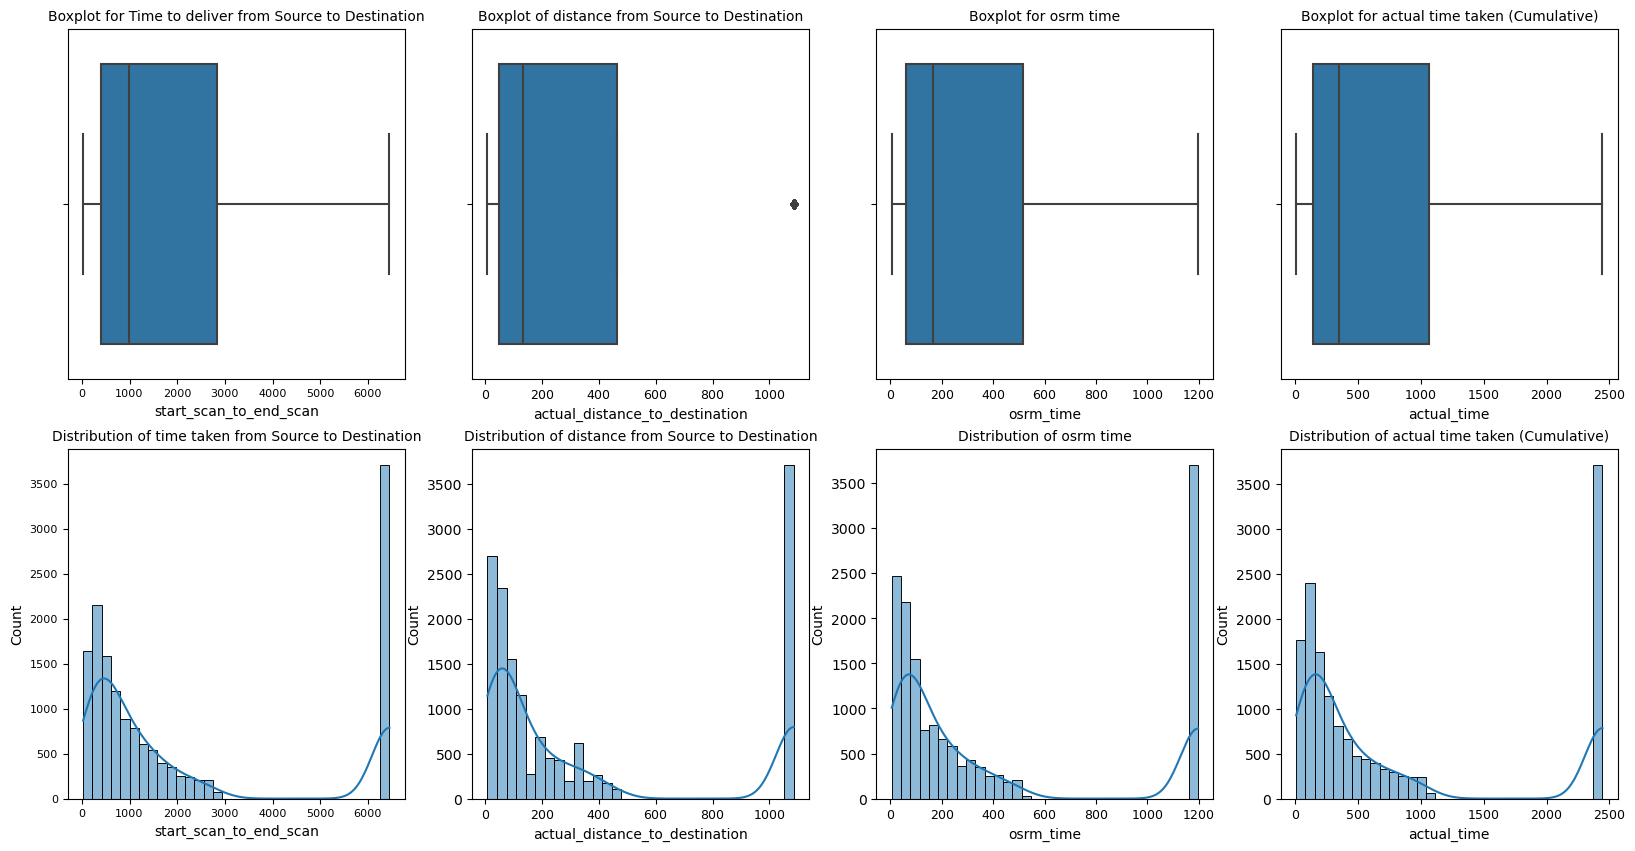

In [49]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Time to deliver from Source to Destination",fontsize = 10)
ax = sns.boxplot(data = df_ot, x = 'start_scan_to_end_scan')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot of distance from Source to Destination",fontsize = 10)
ax = sns.boxplot(data = df_ot, x = 'actual_distance_to_destination', )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot for osrm time",fontsize = 10)
ax = sns.boxplot(data = df_ot, x = 'osrm_time')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot for actual time taken (Cumulative)",fontsize = 10)
ax = sns.boxplot(data = df_ot, x = 'actual_time')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of time taken from Source to Destination",fontsize = 10)
sns.histplot(data = df_ot, x = 'start_scan_to_end_scan', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Distribution of distance from Source to Destination",fontsize = 10)
sns.histplot(data = df_ot, x = 'actual_distance_to_destination', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Distribution of osrm time",fontsize = 10)
sns.histplot(data = df_ot, x = 'osrm_time', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Distribution of actual time taken (Cumulative)",fontsize = 10)
sns.histplot(data = df_ot, x = 'actual_time', kde = True)

plt.show()

***One hot encoding***

In [51]:
df_ohe = df_trip.copy()
df_oheot = df_ot.copy()

df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   trip_uuid                       14817 non-null  object         
 1   start_scan_to_end_scan          14817 non-null  float64        
 2   actual_distance_to_destination  14817 non-null  float64        
 3   actual_time                     14817 non-null  float64        
 4   osrm_time                       14817 non-null  float64        
 5   osrm_distance                   14817 non-null  float64        
 6   od_time_diff_hour               14817 non-null  timedelta64[ns]
 7   dest_city                       14817 non-null  object         
 8   dest_place                      14817 non-null  object         
 9   dest_code                       14817 non-null  object         
 10  source_city                     14817 non-null  object    

In [52]:
df_ohe.nunique()

trip_uuid                         14817
start_scan_to_end_scan             5337
actual_distance_to_destination    14806
actual_time                        3876
osrm_time                          2771
osrm_distance                     14790
od_time_diff_hour                 14817
dest_city                             1
dest_place                          969
dest_code                            30
source_city                           1
source_place                        843
source_code                          37
trip_creation_year                    1
trip_creation_month                   2
trip_creation_day                    22
trip_creation_dayofweek               7
dtype: int64

In [53]:
ohe_data = pd.get_dummies(df_ohe, columns = ['dest_city','source_city'])
oheot_data = pd.get_dummies(df_oheot, columns = ['dest_city','source_city'])
ohe_data.head()

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,dest_place,dest_code,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek,dest_city_IND,source_city_IND
0,trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728,209304,AAA,209304,AAA,2018,9,12,2,True,True
1,trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161,561203,AAB,561203,AAB,2018,9,12,2,True,True
2,trip-153671043369099517,248631.0,68163.502238,112225.0,65768.0,89447.2488,2 days 03:39:43.415483,000000,ACB,000000,ACB,2018,9,12,2,True,True
3,trip-153671046011330457,200.0,28.529648,82.0,24.0,31.6475,0 days 01:40:29.696112,401104,AAA,400072,AAB,2018,9,12,2,True,True
4,trip-153671052974046625,1586.0,239.007304,556.0,207.0,266.2914,0 days 03:52:33.373696,583119,AAA,583101,AAA,2018,9,12,2,True,True


***Normalization / Standarddization***

In [55]:
df_norm = df_ohe.copy()
df_norm1 = df_oheot.copy()

In [56]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   trip_uuid                       14817 non-null  object         
 1   start_scan_to_end_scan          14817 non-null  float64        
 2   actual_distance_to_destination  14817 non-null  float64        
 3   actual_time                     14817 non-null  float64        
 4   osrm_time                       14817 non-null  float64        
 5   osrm_distance                   14817 non-null  float64        
 6   od_time_diff_hour               14817 non-null  timedelta64[ns]
 7   dest_city                       14817 non-null  object         
 8   dest_place                      14817 non-null  object         
 9   dest_code                       14817 non-null  object         
 10  source_city                     14817 non-null  object    

In [57]:
df_norm.drop(['trip_uuid','dest_city','dest_place','dest_code','source_city','source_place','source_code','od_time_diff_hour'], axis = 1, inplace = True)
df_norm.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
0,43659.0,8860.812105,15682.0,7787.0,10577.7647,2018,9,12,2
1,906.0,240.208306,399.0,210.0,269.4308,2018,9,12,2
2,248631.0,68163.502238,112225.0,65768.0,89447.2488,2018,9,12,2
3,200.0,28.529648,82.0,24.0,31.6475,2018,9,12,2
4,1586.0,239.007304,556.0,207.0,266.2914,2018,9,12,2


In [58]:
minmax_scaling(df_norm, columns=['actual_time', 'osrm_time','osrm_distance','trip_creation_year','trip_creation_month','trip_creation_day'])

,actual_time,osrm_time,osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day
0,0.093341,0.101122,0.103203,NaN,0.0,0.379310
1,0.002323,0.002651,0.002542,NaN,0.0,0.379310
2,0.668306,0.854640,0.873362,NaN,0.0,0.379310
3,0.000435,0.000234,0.000220,NaN,0.0,0.379310
4,0.003258,0.002612,0.002512,NaN,0.0,0.379310
...,...,...,...,...,...,...
14812,0.001054,0.001845,0.001503,NaN,1.0,0.068966
14813,0.000143,0.000169,0.000171,NaN,1.0,0.068966
14814,0.003216,0.001663,0.001502,NaN,1.0,0.068966
14815,0.003520,0.005718,0.004301,NaN,1.0,0.068966


In [59]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_norm.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['start_scan_to_end_scan','actual_distance_to_destination','actual_time', 'osrm_time','osrm_distance','trip_creation_year','trip_creation_month','trip_creation_day','trip_creation_dayofweek'])
df_scaled

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
0,0.109969,0.104014,0.093341,0.101122,0.103203,0.0,0.0,0.379310,0.333333
1,0.002218,0.002717,0.002323,0.002651,0.002542,0.0,0.0,0.379310,0.333333
2,0.626566,0.800858,0.668306,0.854640,0.873362,0.0,0.0,0.379310,0.333333
3,0.000439,0.000229,0.000435,0.000234,0.000220,0.0,0.0,0.379310,0.333333
4,0.003932,0.002703,0.003258,0.002612,0.002512,0.0,0.0,0.379310,0.333333
...,...,...,...,...,...,...,...,...,...
14812,0.002142,0.001552,0.001054,0.001845,0.001503,0.0,1.0,0.068966,0.333333
14813,0.000237,0.000190,0.000143,0.000169,0.000171,0.0,1.0,0.068966,0.333333
14814,0.003118,0.000996,0.003216,0.001663,0.001502,0.0,1.0,0.068966,0.333333
14815,0.003249,0.004069,0.003520,0.005718,0.004301,0.0,1.0,0.068966,0.333333


***Hypothesis Testing / Visual Analysis***

In [61]:
df_trip.columns

Index(['trip_uuid', 'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'od_time_diff_hour',
       'dest_city', 'dest_place', 'dest_code', 'source_city', 'source_place',
       'source_code', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'trip_creation_dayofweek'],
      dtype='object')

***Correlation Test :***

* **Ho : No significant relationship between two features (Corr = 0)**
* **Ha : Significant relationship between features (Corr != 0)**

In [63]:
# Performing Chi Sqaure test to check if actual_time vs osrm_time are correlated

aplha = 0.05   # Level of significance

x = df_trip['actual_time']
y = df_trip['osrm_time']

stat, pvalue = pearsonr(x,y)

print("Test statistic = ", stat)
print("p value = ", pvalue)

if pvalue < aplha:
  print("\nReject Ho")
  print("The two features are correlated")
else:
  print("Don't Reject Ho")
  print("The two features are NOT correlated")

Test statistic =  0.9888803631615561
p value =  0.0

Reject Ho
The two features are correlated


In [64]:
# Performing Chi Sqaure test to check if actual_time vs start_scan_to_end_scan are correlated

aplha = 0.05   # Level of significance

x = df_trip['actual_time']
y = df_trip['start_scan_to_end_scan']

stat, pvalue = pearsonr(x,y)

print("Test statistic = ", stat)
print("p value = ", pvalue)

if pvalue < aplha:
  print("\nReject Ho")
  print("The two features are correlated")
else:
  print("Don't Reject Ho")
  print("The two features are NOT correlated")

Test statistic =  0.9956903800120013
p value =  0.0

Reject Ho
The two features are correlated


In [65]:
# Performing Chi Sqaure test to check if actual_time vs start_scan_to_end_scan are correlated

aplha = 0.05   # Level of significance

x = df_trip['osrm_distance']
y = df_trip['actual_distance_to_destination']

stat, pvalue = pearsonr(x,y)

print("Test statistic = ", stat)
print("p value = ", pvalue)

if pvalue < aplha:
  print("\nReject Ho")
  print("The two features are correlated")
else:
  print("Don't Reject Ho")
  print("The two features are NOT correlated")

Test statistic =  0.9984094058353458
p value =  0.0

Reject Ho
The two features are correlated


In [66]:
df_trip.head(2)

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,od_time_diff_hour,dest_city,dest_place,dest_code,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_dayofweek
0,trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,0 days 16:39:30.322728,IND,209304,AAA,IND,209304,AAA,2018,9,12,2
1,trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,0 days 02:02:46.769161,IND,561203,AAB,IND,561203,AAB,2018,9,12,2


***Comment : Hypothesis testing has correlation between all features tested***

***Univariate Analysis***

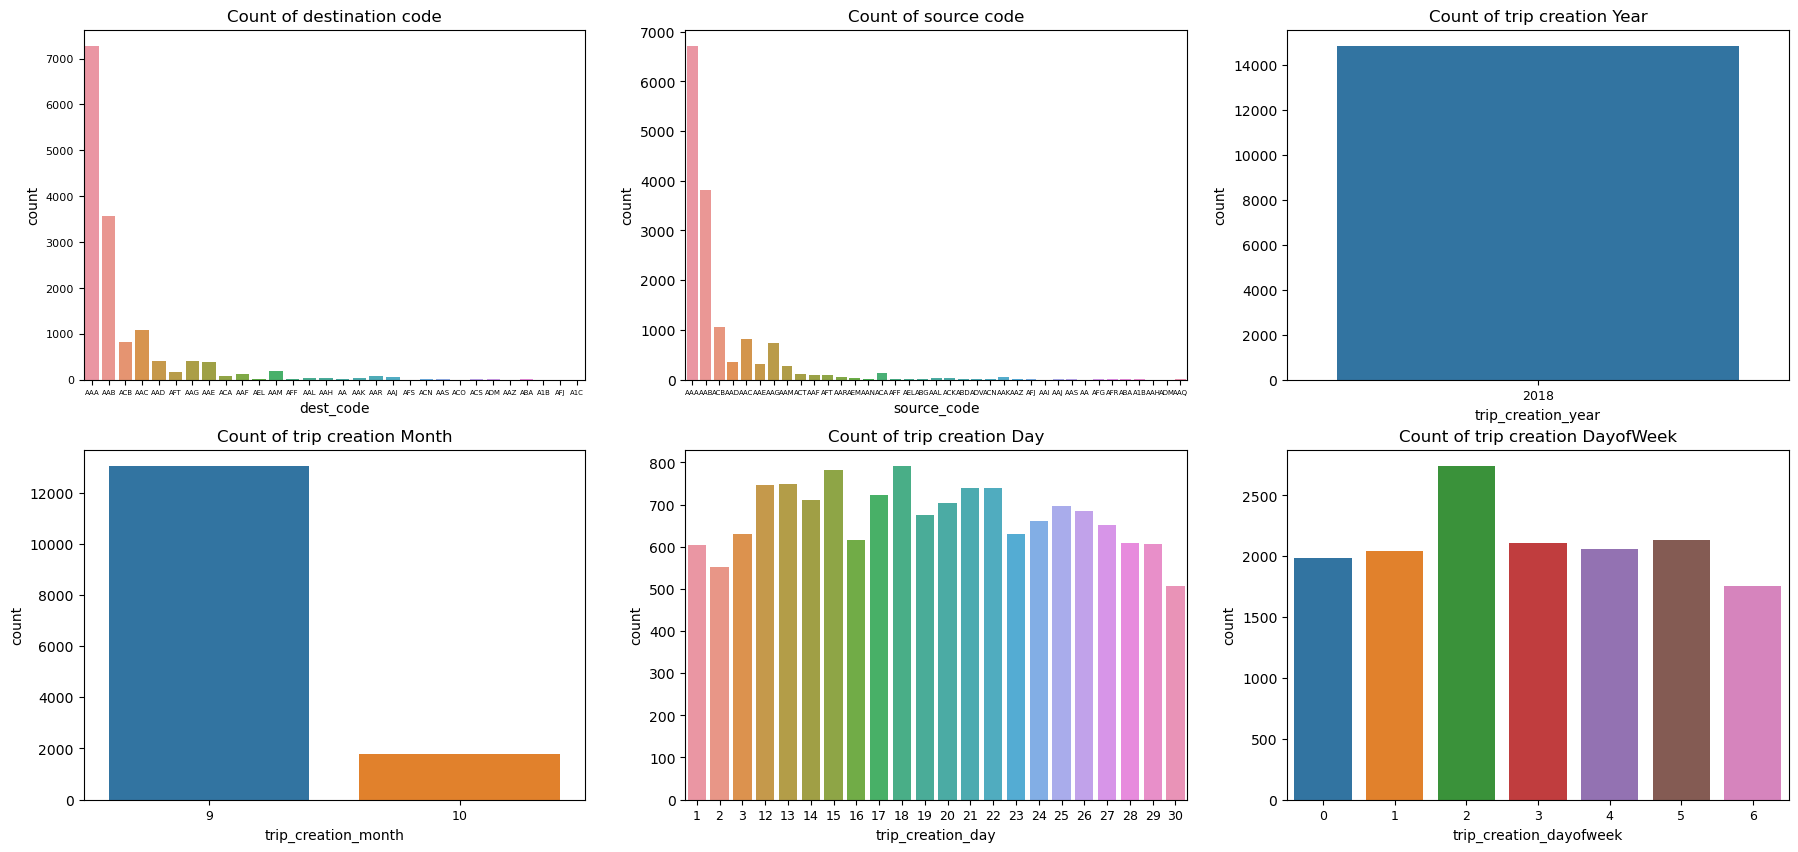

In [69]:
# Univariate Plot of Categorical variables

plt.figure(figsize = (22,10))

plt.subplot(2,3,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 5)
plt.title("Count of destination code")
sns.countplot(data = df_trip, x = 'dest_code')

plt.subplot(2,3,2)
plt.xticks(fontsize = 5)
plt.title("Count of source code")
sns.countplot(data = df_trip, x = 'source_code', )

plt.subplot(2,3,3)
plt.xticks(fontsize = 9)
plt.title("Count of trip creation Year")
sns.countplot(data = df_trip, x = 'trip_creation_year') #order = df_trip["Age"].value_counts().index)

plt.subplot(2,3,4)
plt.xticks(fontsize = 9)
plt.title("Count of trip creation Month")
sns.countplot(data = df_trip, x = 'trip_creation_month')

plt.subplot(2,3,5)
plt.xticks(fontsize = 9)
plt.title("Count of trip creation Day")
sns.countplot(data = df_trip, x = 'trip_creation_day')

plt.subplot(2,3,6)
plt.xticks(fontsize = 9)
plt.title("Count of trip creation DayofWeek")
sns.countplot(data = df_trip, x = 'trip_creation_dayofweek')

plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

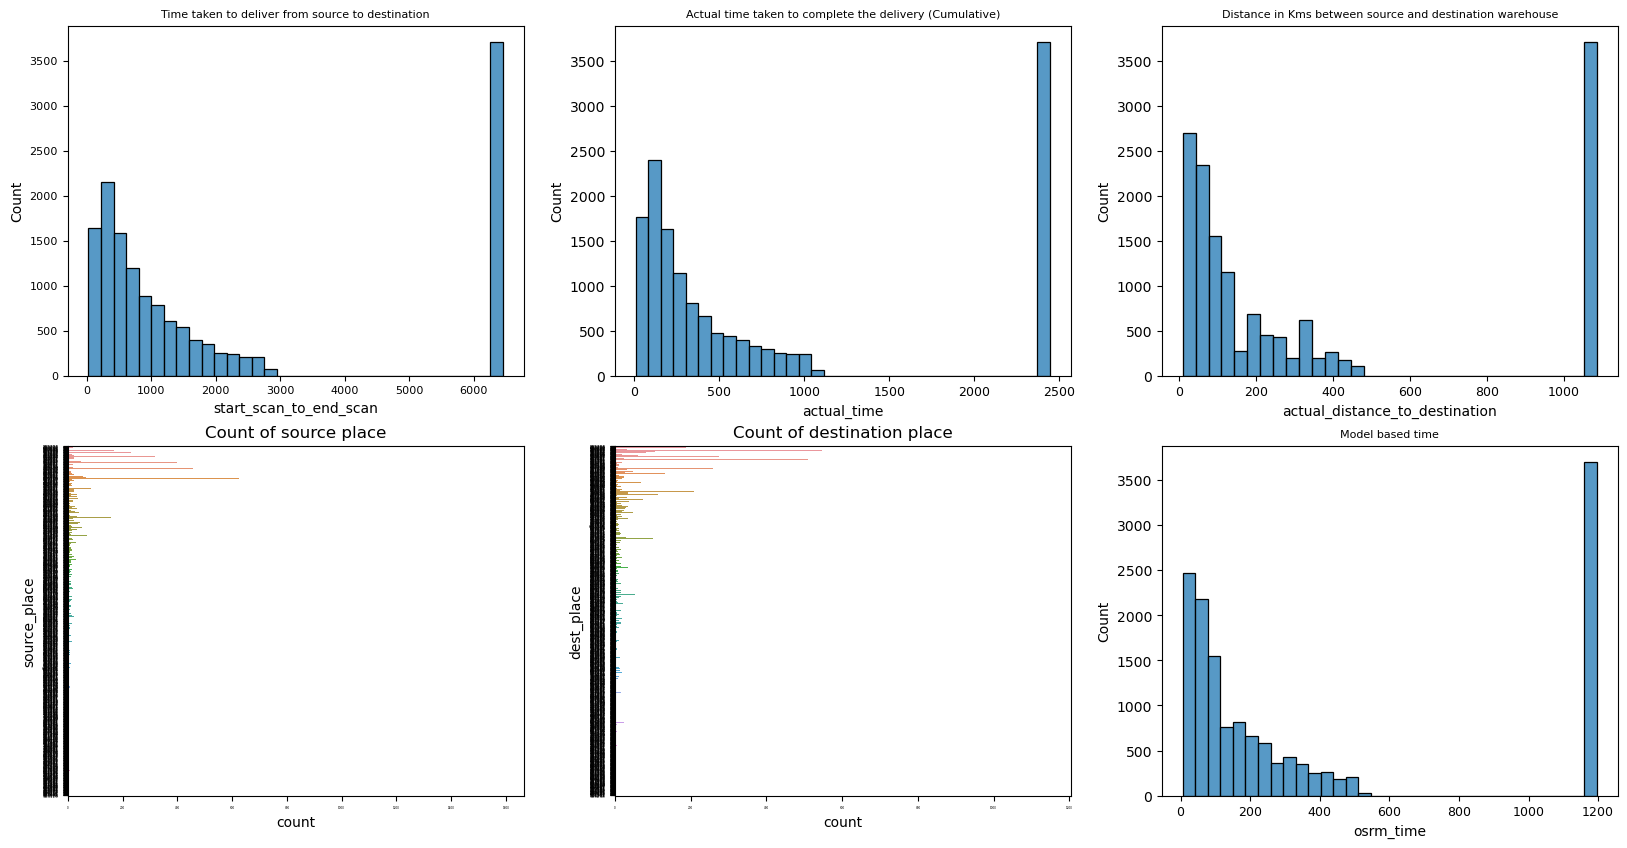

In [70]:
# Univariate plot of Numerical Variables

plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Time taken to deliver from source to destination", fontsize = 8)
sns.histplot(data = df_oheot, x = 'start_scan_to_end_scan')

plt.subplot(2,3,2)
plt.xticks(fontsize = 9)
plt.title("Actual time taken to complete the delivery (Cumulative)", fontsize = 8)
sns.histplot(data = df_oheot, x = 'actual_time') #order = df_trip["actual_time"].value_counts().index)

plt.subplot(2,3,3)
plt.xticks(fontsize = 9)
plt.title("Distance in Kms between source and destination warehouse", fontsize = 8)
sns.histplot(data = df_oheot, x = 'actual_distance_to_destination') #order = df_trip["actual_distance_to_destination"].value_counts().index)

plt.subplot(2,3,4)
plt.xticks(fontsize = 2)
plt.yticks(fontsize = 3)
plt.title("Count of source place")
sns.countplot(data = df_trip, y = 'source_place' )

plt.subplot(2,3,5)
plt.xticks(fontsize = 2)
plt.yticks(fontsize = 3)
plt.title("Count of destination place")
sns.countplot(data = df_trip, y = 'dest_place' )

plt.subplot(2,3,6)
plt.xticks(fontsize = 9)
plt.title("Model based time", fontsize = 8)
sns.histplot(data = df_oheot, x = 'osrm_time') #, order = df_trip["osrm_time"].value_counts().index)

plt.show()

***Bivariate / Multivariate Analysis***

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

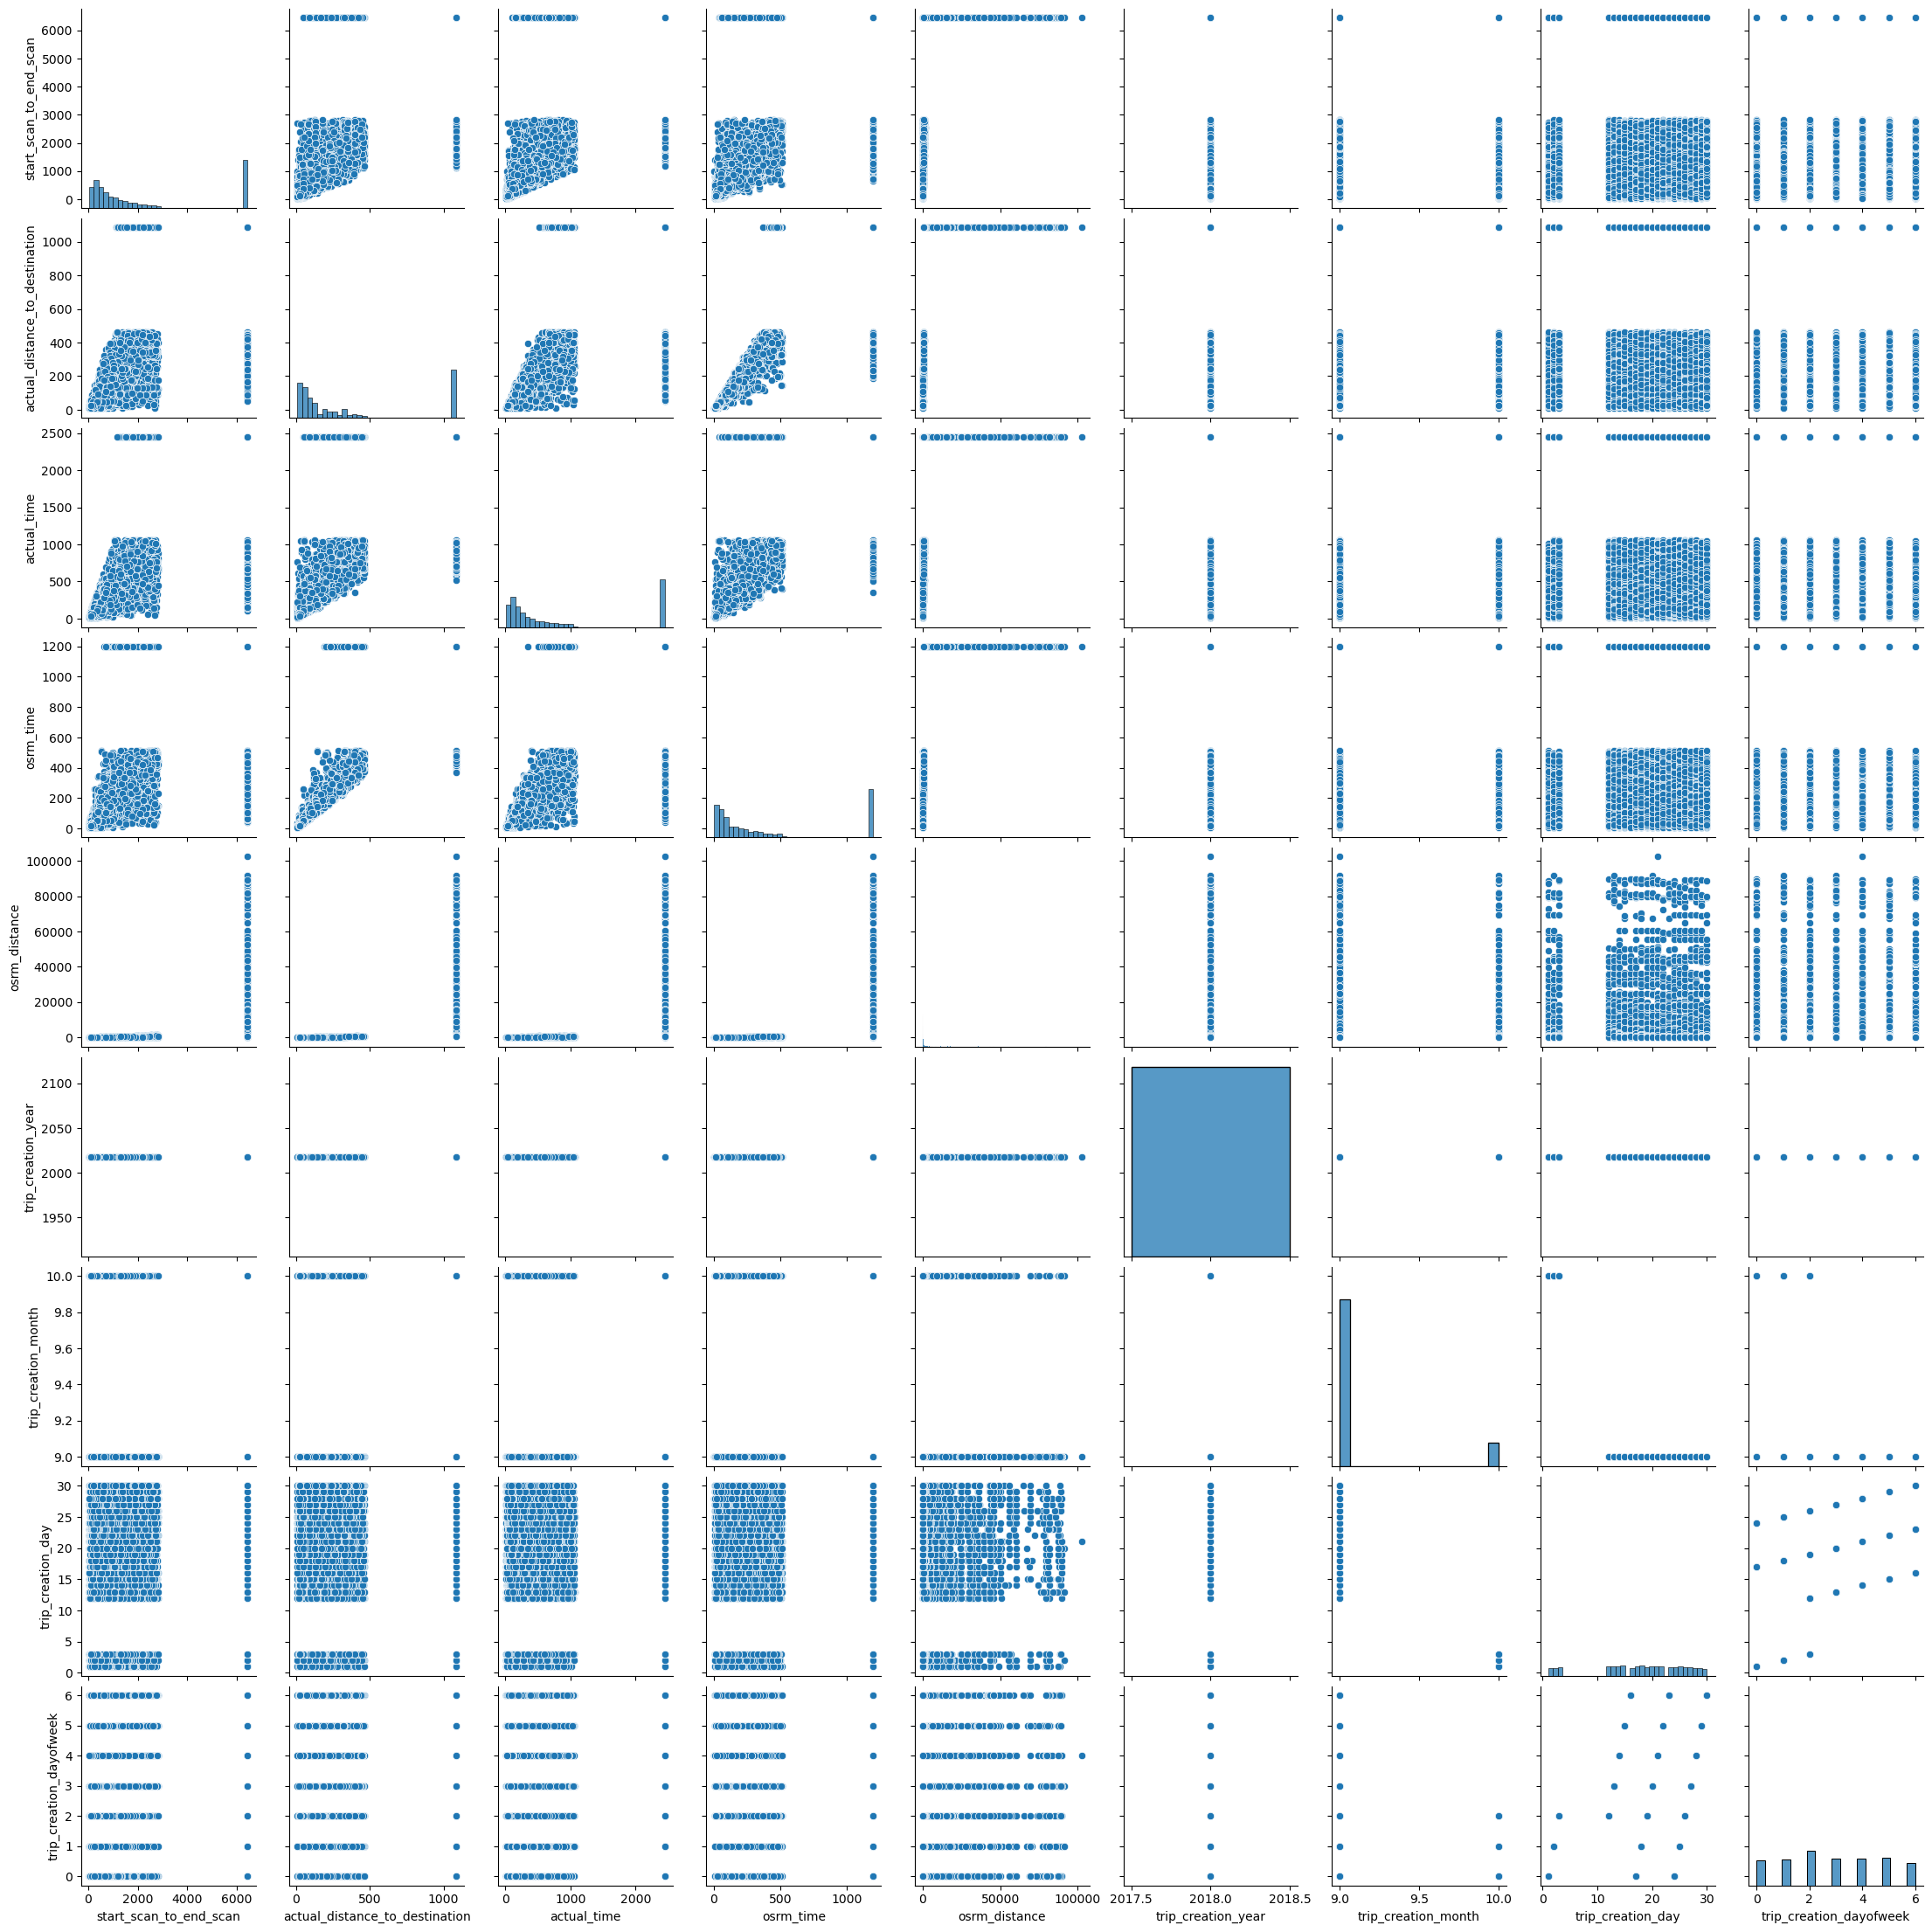

In [72]:
sns.pairplot(data = df_oheot)
plt.show()

In [73]:
sns.heatmap(df_oheot.corr(), annot= True)
plt.show()

ValueError: could not convert string to float: 'trip-153671041653548748'

In [ ]:
df1 = df.copy()
df1['source_code'] = df1['source_center'].str.strip().str[9:12]
df1['destination_code'] = df1['destination_center'].str.strip().str[9:12]
df1.head()

In [ ]:
df_busyRoute = df1[((df1['source_code'] == 'AAA') | (df1['source_code'] == 'AAB')) & ((df1['destination_code'] == 'AAA') | (df1['destination_code'] == 'AAB'))]
df_busyRoute.head()

In [ ]:
df_busyRoute['od_time_diff_hour'] = df_busyRoute['od_end_time'] - df_busyRoute['od_start_time']

In [ ]:
df_busyRoute.describe()

In [ ]:
df_busyRoute['source_name'].value_counts()

In [ ]:
df_busyRoute['destination_name'].value_counts()

In [ ]:
df_busyRoute.describe(include = object)

# ***Insights***
* Hypothesis testing for tested features have strong correlation i.e. orsm time and distance are strongly correlated with actual time and actual distance between warehouses.
* Most of the trips are with source states with source codes AAA or AAB
>* Bangalore_Nelmngla_H (Karnataka)      5894
>* Pune_Tathawde_H (Maharashtra)         2197
>* Bengaluru_Bomsndra_HB (Karnataka)     1781
>* Kolkata_Dankuni_HB (West Bengal)      1413
>* Bhubaneshwar_Hub (Orissa)             1409

* Most of the trips are with destination states with destination codes AAA or AAB
>* Bangalore_Nelmngla_H (Karnataka)       4410
>* Kanpur_Central_H_6 (Uttar Pradesh)     1528
>* Pune_Tathawde_H (Maharashtra)          1474
>* Bhubaneshwar_Hub (Orissa)              1368
>* Jaipur_Hub (Rajasthan)                 1340

* Trip creation data is provided for only year 2018 for the month of September and October.
* September has most number of orders as compared to October.
* Trips are created comparably pretty much on all days of the month. Trip is the highest on 15th and 18th and lowest on 2nd and 30th.
* Number of trips created are highest on Wednesday, lowest on Sunday, and almost the same on rest of the days.


# ***Recommendation***

* Since number of trips are highest on Wednesdays - Provide different incentives to customers on different days of the week.
This will help increase the number of trips booked, based on which incentive suits the customers best and further analysis could be done on it based on customer response.

* Because number of trips are highest on 15th and 18th and lowest on 2nd and 30th - Based on further analysis that can be done on why a consumer would choose your competitor as opposed to you -
Find the missing gap between Delhivery and the competitors to bring an edge to the kind of service Delhivery provides.

* Since Karnataka, Maharashtra, Orissa have the busiest routes and most of the orders and to / fro from these states, make the logistics more efficient by increase warehouses where needed to provide better service which could help increase the demand for Delhivery in these states and also help keep up with the increased demand.
Further research and technological advancements can be done to improve profitability for revenue coming from these states.

* In states where number of trips are not frequent, dedicate a martketing budget for these states to increase the demand and depending on further analysis ensure warehouses are set up in correct locations to ensure most efficient logistics which will also help save costs.